In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('flood dataset.xlsx')

In [5]:
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [6]:
df.isnull().sum()

Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

In [7]:
df.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [9]:
print(df.columns)

Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')


<Axes: ylabel='ANNUAL'>

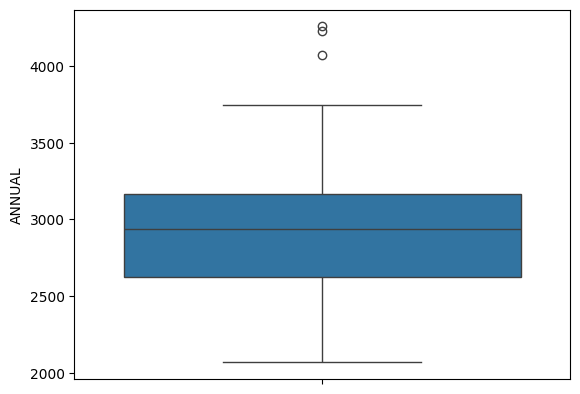

In [10]:
sns.boxplot(df['ANNUAL'])

In [11]:
Q3 = df.ANNUAL.quantile(0.75)
Q1 = df.ANNUAL.quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit
df['ANNUAL']=np.where(df['ANNUAL']>Upper_limit,3968.4000000000005,df['ANNUAL'])

<Axes: ylabel='Jan-Feb'>

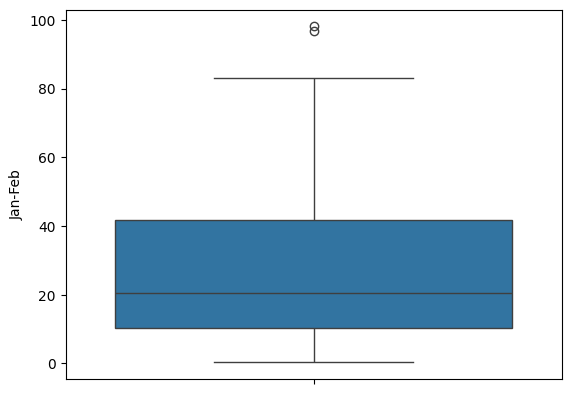

In [12]:
sns.boxplot(df['Jan-Feb'])

In [13]:
Q3 = df['Jan-Feb'].quantile(0.75)
Q1 = df['Jan-Feb'].quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit
df['Jan-Feb']=np.where(df['Jan-Feb']>Upper_limit,88.625,df['Jan-Feb'])

<Axes: ylabel='Mar-May'>

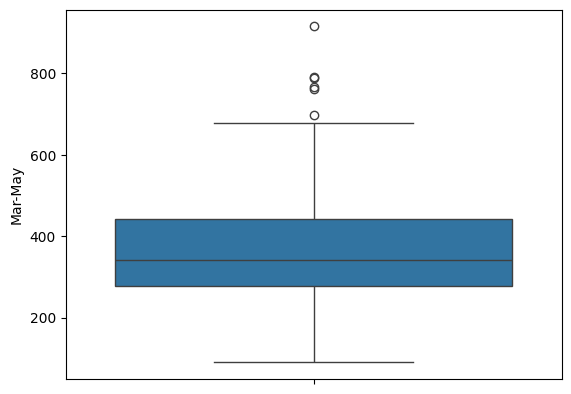

In [14]:
sns.boxplot(df['Mar-May'])

In [15]:
Q3 = df['Mar-May'].quantile(0.75)
Q1 = df['Mar-May'].quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit
df['Mar-May']=np.where(df['Mar-May']>Upper_limit,690.6249999999999,df['Mar-May'])

<Axes: ylabel='Jun-Sep'>

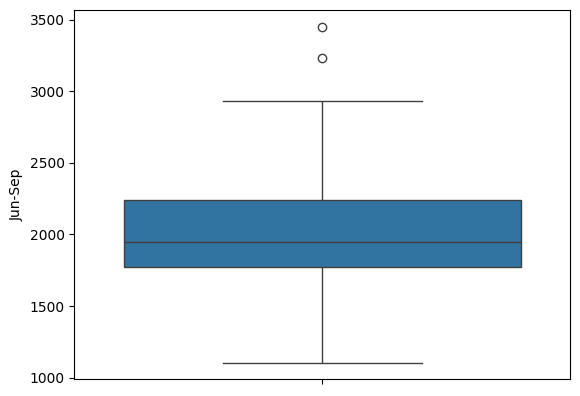

In [16]:
sns.boxplot(df['Jun-Sep'])

In [17]:
Q3 = df['Jun-Sep'].quantile(0.75)
Q1 = df['Jun-Sep'].quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit
Lower_limit = Q1 - 1.5 * IQR
print(Lower_limit)
df['Jun-Sep']=np.where(df['Jun-Sep']>Upper_limit,2902.3249999999994,df['Jun-Sep'])

1057.7750000000003


In [18]:
df['Jun-Sep'] = np.where(df['Jun-Sep'] < Lower_limit, 1033.3250000000003, df['Jun-Sep'])

<Axes: >

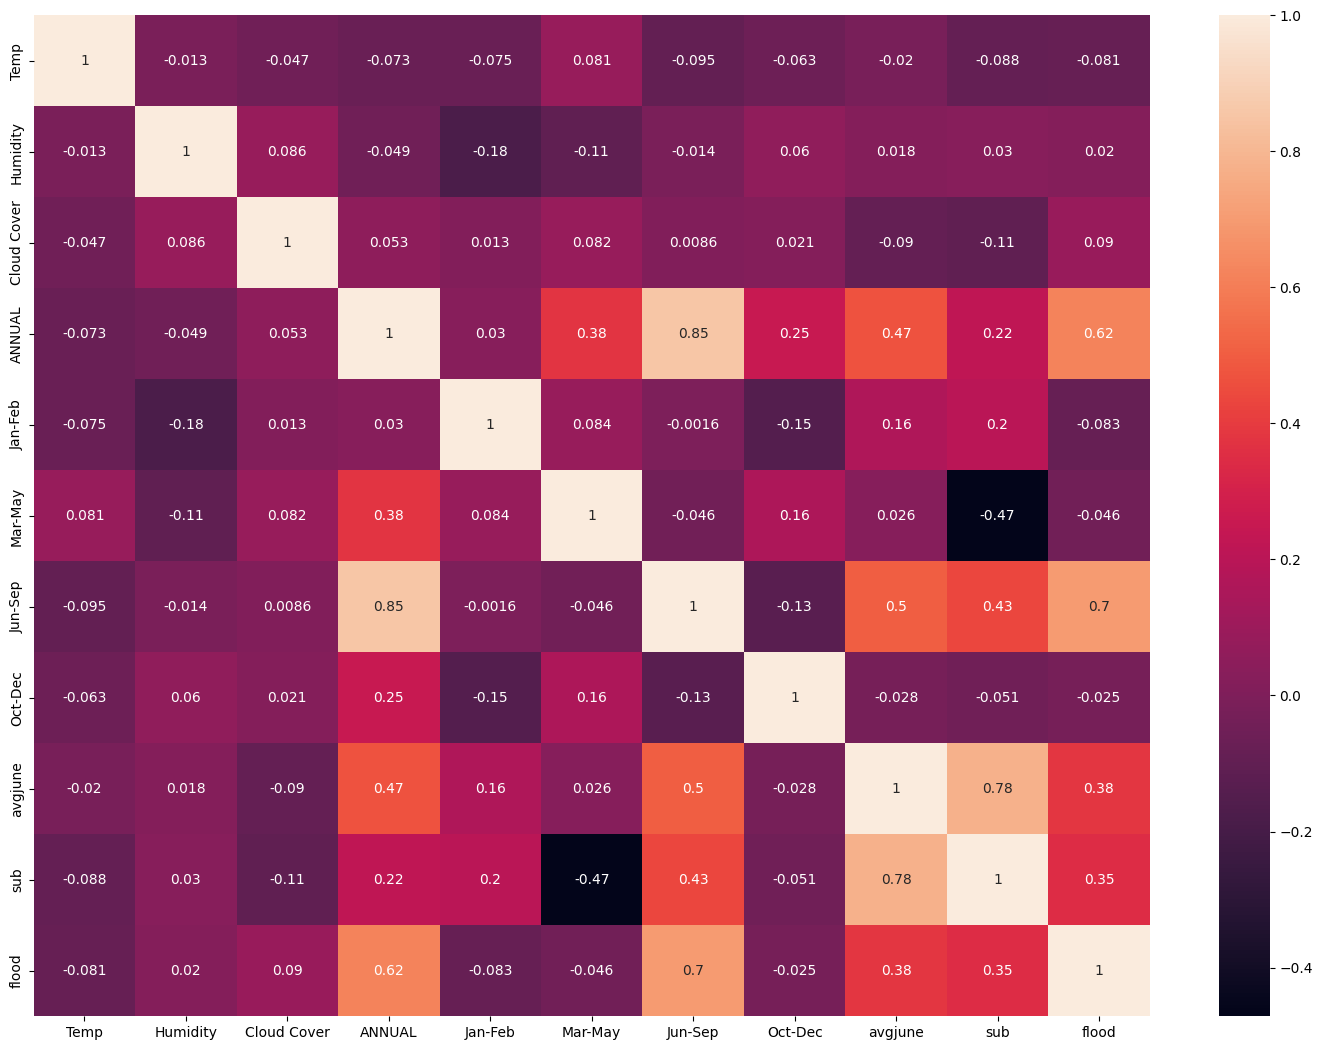

In [19]:
plt.figure(figsize =(18,13))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.corr()['flood'].sort_values(ascending= False)

flood          1.000000
Jun-Sep        0.697246
ANNUAL         0.616928
avgjune        0.379778
sub            0.349828
Cloud Cover    0.089801
Humidity       0.020250
Oct-Dec       -0.024852
Mar-May       -0.045788
Temp          -0.080946
Jan-Feb       -0.083381
Name: flood, dtype: float64

In [21]:
#x and y split
x=df.iloc[:,:-1]
x.head()
y=df['flood']

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_tr,x_t,y_tr,y_t=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [24]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [25]:
y_p=rf.predict(x_t)
y_p1=rf.predict(x_tr)

In [26]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy score for testing data: ",accuracy_score(y_t,y_p))
print("Accuracy score for training data: ",accuracy_score(y_tr,y_p1))

Accuracy score for testing data:  0.9714285714285714
Accuracy score for training data:  1.0


In [27]:
pd.crosstab(y_t,y_p)

col_0,0,1
flood,,
0,26,1
1,0,8


In [28]:
print(classification_report(y_t,y_p))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.89      1.00      0.94         8

    accuracy                           0.97        35
   macro avg       0.94      0.98      0.96        35
weighted avg       0.97      0.97      0.97        35



In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_tr, y_tr)
# Use the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_t)
y_pred1 = best_model.predict(x_tr)
y_rf=accuracy_score(y_t,y_pred)
y_rf1=accuracy_score(y_tr,y_pred1)
print(y_rf)
print(y_rf1)

0.9714285714285714
1.0


In [33]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()
kmodel.fit(x_tr,y_tr)
y_predk = kmodel.predict(x_t)
y_pred_train = kmodel.predict(x_tr)
knn=accuracy_score(y_t,y_predk)
knn1=accuracy_score(y_tr,y_pred_train)
print("Accuracy score for testing data: ",knn)
print("Accuracy score for training data: ",knn1)

Accuracy score for testing data:  0.9428571428571428
Accuracy score for training data:  0.95


In [32]:
df.head(15)

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0
5,30,70,38,2708.0,34.1,230.0,1943.1,500.8,138.300000,254.1,0
6,29,74,40,3671.1,23.7,328.0,2737.8,581.7,256.966667,669.5,1
7,30,78,36,2648.3,28.8,283.7,2023.6,312.2,197.533333,450.0,0
8,30,71,40,3050.2,65.9,628.3,1940.4,415.5,234.900000,231.5,0
9,30,70,34,2848.6,28.4,296.7,1886.5,637.0,226.666667,531.2,0


In [39]:
df.flood.value_counts()

flood
0    99
1    16
Name: count, dtype: int64

In [46]:
#smote analysis
from imblearn.over_sampling import SMOTE


In [48]:
smote = SMOTE()

In [51]:
x_train_smote, y_train_smote = smote.fit_resample(x_tr,y_tr)


In [52]:
y_tr.value_counts()
y_train_smote.value_counts()

flood
0    72
1    72
Name: count, dtype: int64

In [54]:
knn =KNeighborsClassifier()

In [59]:
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [62]:
y_predict = knn.predict(x_t)  
y_predict1 = knn.predict(x_train_smote)  

In [64]:
pd.crosstab(y_t,y_predict)

col_0,0,1
flood,,
0,24,3
1,0,8


In [67]:
print("test accuracy:",accuracy_score(y_t,y_predict))
print("train accuracy:",accuracy_score(y_train_smote,y_predict1))

print(classification_report(y_t,y_predict))

test accuracy: 0.9142857142857143
train accuracy: 0.9791666666666666
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.73      1.00      0.84         8

    accuracy                           0.91        35
   macro avg       0.86      0.94      0.89        35
weighted avg       0.94      0.91      0.92        35



In [68]:
knn.predict([[29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.867,649.9]])

c:\Users\Kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [69]:
knn.predict([[28, 75, 40, 3326.6, 9.3, 275.7, 2403.4, 638.2, 130.300000, 256.4]])

c:\Users\Kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [70]:
knn.predict([[30,75,45,3545.8,24.5,300.4,2545.4,655.9,145.89,569.1]])

c:\Users\Kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [71]:
import pickle
pickle.dump(knn,open('floodpredicition.pkl','wb'))